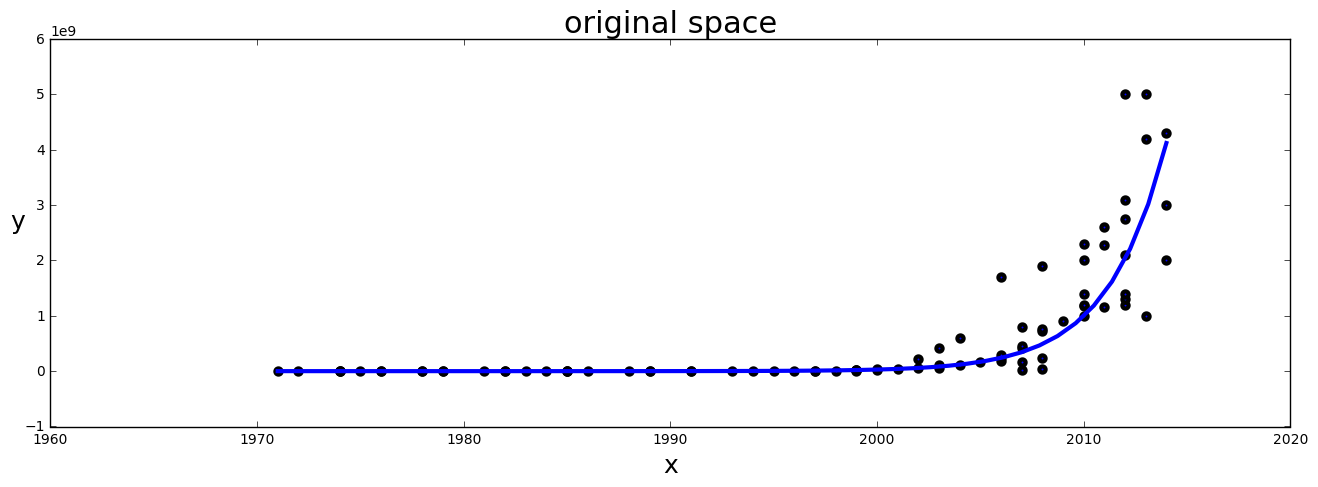

In [5]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

# import the dataset
reader = csv.reader(open("transistor_counts.csv", "rb"), delimiter=",")
d = list(reader)

# import data and reshape appropriately
data = np.array(d).astype("float")
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# transform output
y_logged = np.log(y)

# pad with ones -- > to setup linear system
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

# # set up linear system to solve for weights
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += y_logged[i]*x_new[i,:].T

# solve linear system for weights
w = np.linalg.solve(A,b)

### plot data with sinusoidal fit in original space and corresponding linear fit in transformed feature space 
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,1,1)  # panel for original space

# plot data and fit
ax1.scatter(x,y,linewidth = 3)
s = np.linspace(np.min(x),np.max(x))
t = np.exp(w[0] + w[1]*s)
ax1.plot(s,t,linewidth = 3)
ax1.set_xlabel('x',fontsize =18)
ax1.set_ylabel('y',rotation = 0,fontsize = 18)
ax1.set_title('original space',fontsize = 22)